In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
import matplotlib.pyplot as plt


In [3]:
# loading the data file
df = pd.read_csv('http://192.168.1.195/mongo-php/1.csv')

In [4]:
df.head(100)


_id  Plaform                   CreateRow  \
0  5ea6e171d15e93b1c87be04f  twitter  2020-04-27T15:43:13.908597   
1  5ea6e172d15e93b1c87be050  twitter  2020-04-27T15:43:14.040529   
2  5ea6e172d15e93b1c87be052  twitter  2020-04-27T15:43:14.225719   
3  5ea6e173d15e93b1c87be05a  twitter  2020-04-27T15:43:15.194478   
4  5ea6e173d15e93b1c87be060  twitter  2020-04-27T15:43:15.600134   

             TwCreated description text localizacion  
0  2020-04-27T13:43:08         NaN  NaN          NaN  
1  2020-04-27T13:43:08         NaN  NaN          NaN  
2  2020-04-27T13:43:09         NaN  NaN          NaN  
3  2020-04-27T13:43:10         NaN  NaN          NaN  
4  2020-04-27T13:43:10         NaN  NaN          NaN

In [5]:
df.tail

<bound method NDFrame.tail of                            _id  Plaform                   CreateRow  \
0     5ea6e171d15e93b1c87be04f  twitter  2020-04-27T15:43:13.908597   
1     5ea6e172d15e93b1c87be050  twitter  2020-04-27T15:43:14.040529   
2     5ea6e172d15e93b1c87be052  twitter  2020-04-27T15:43:14.225719   
3     5ea6e173d15e93b1c87be05a  twitter  2020-04-27T15:43:15.194478   
4     5ea6e173d15e93b1c87be060  twitter  2020-04-27T15:43:15.600134   
...                        ...      ...                         ...   
4100  5eab07176ab588c56b52e7b0  twitter  2020-04-30T19:12:55.576598   
4101  5eab07246ab588c56b52e7b1  twitter  2020-04-30T19:13:08.822179   
4102  5eab07316ab588c56b52e7b2  twitter  2020-04-30T19:13:21.212628   
4103  5eab07466ab588c56b52e7b3  twitter  2020-04-30T19:13:42.877686   
4104  5eab07496ab588c56b52e7b4  twitter  2020-04-30T19:13:45.005128   

                TwCreated                                        description  \
0     2020-04-27T13:43:08            

In [36]:
df=df.dropna()

In [37]:
df.shape

(3006, 8)

In [38]:
df.head()

_id  Plaform                   CreateRow  \
143  5eaa81af6ab588c56b52d83c  twitter  2020-04-30T09:43:43.708120   
144  5eaa81c16ab588c56b52d83d  twitter  2020-04-30T09:44:01.178134   
145  5eaa81ca6ab588c56b52d83e  twitter  2020-04-30T09:44:10.103843   
146  5eaa81e96ab588c56b52d83f  twitter  2020-04-30T09:44:41.319540   
149  5eaa82066ab588c56b52d842  twitter  2020-04-30T09:45:10.563481   

               TwCreated                                        description  \
143  2020-04-30T07:43:38  Formacin online y presencial.\nCursos de forma...   
144  2020-04-30T07:43:55  Asociacin sin animo de lucro. Orientacin y Emp...   
145  2020-04-30T07:44:04  Tu solucin innovadora en #RecursosHumanos #Lid...   
146  2020-04-30T07:44:36  Servicios Inmobiliarios - Administracin Propie...   
149  2020-04-30T07:45:05  Potenciamos lo mejor de ti formandote en lo qu...   

                                                  text       localizacion  \
143  Agradecemos mucho a FUNDAE el documento de acl...     Granada, Espaa   
144  Curso gratuito ATENCIN DOMICILIARIA @Macrosad ...  Provincia de Cdiz   
145  Por qu no unir la formacin experiencial al mun...   +34 963 46 85 80   
146  RT @IMFFORMACION: En IMF queremos que sigas ap...         Bogot D.C.   
149  Cursos temticos https://t.co/Lj74WSixFI #forma...    Zaragoza, Espaa   

                                            text_clean  
143  agradecemos mucho a fundae el documento de acl...  
144  curso gratuito atencin domiciliaria   horas de...  
145  por qu no unir la formacin experiencial al mun...  
146    en imf queremos que sigas aprendiendo al mxi...  
149        cursos temticos  formacion online distancia

In [39]:
import nltk
import re
import string

In [40]:
def  clean_text(df):
    df["descrip"] = df["description"].str.lower()
    df["descrip"] = df["descrip"].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df["descrip"] = df["descrip"].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df


In [42]:
data_clean = clean_text(df)
data_clean.head()

_id  Plaform                   CreateRow  \
143  5eaa81af6ab588c56b52d83c  twitter  2020-04-30T09:43:43.708120   
144  5eaa81c16ab588c56b52d83d  twitter  2020-04-30T09:44:01.178134   
145  5eaa81ca6ab588c56b52d83e  twitter  2020-04-30T09:44:10.103843   
146  5eaa81e96ab588c56b52d83f  twitter  2020-04-30T09:44:41.319540   
149  5eaa82066ab588c56b52d842  twitter  2020-04-30T09:45:10.563481   

               TwCreated                                        description  \
143  2020-04-30T07:43:38  Formacin online y presencial.\nCursos de forma...   
144  2020-04-30T07:43:55  Asociacin sin animo de lucro. Orientacin y Emp...   
145  2020-04-30T07:44:04  Tu solucin innovadora en #RecursosHumanos #Lid...   
146  2020-04-30T07:44:36  Servicios Inmobiliarios - Administracin Propie...   
149  2020-04-30T07:45:05  Potenciamos lo mejor de ti formandote en lo qu...   

                                                  text       localizacion  \
143  Agradecemos mucho a FUNDAE el documento de acl...     Granada, Espaa   
144  Curso gratuito ATENCIN DOMICILIARIA @Macrosad ...  Provincia de Cdiz   
145  Por qu no unir la formacin experiencial al mun...   +34 963 46 85 80   
146  RT @IMFFORMACION: En IMF queremos que sigas ap...         Bogot D.C.   
149  Cursos temticos https://t.co/Lj74WSixFI #forma...    Zaragoza, Espaa   

                                            text_clean  \
143  agradecemos mucho a fundae el documento de acl...   
144  curso gratuito atencin domiciliaria   horas de...   
145  por qu no unir la formacin experiencial al mun...   
146    en imf queremos que sigas aprendiendo al mxi...   
149        cursos temticos  formacion online distancia   

                                               descrip  
143  formacin online y presencialcursos de formacin...  
144  asociacin sin animo de lucro orientacin y empl...  
145  tu solucin innovadora en recursoshumanos lider...  
146  servicios inmobiliarios  administracin propied...  
149  potenciamos lo mejor de ti formandote en lo qu...

In [43]:
import nltk.corpus

nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('spanish')
df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
df.head()

_id  Plaform                   CreateRow  \
143  5eaa81af6ab588c56b52d83c  twitter  2020-04-30T09:43:43.708120   
144  5eaa81c16ab588c56b52d83d  twitter  2020-04-30T09:44:01.178134   
145  5eaa81ca6ab588c56b52d83e  twitter  2020-04-30T09:44:10.103843   
146  5eaa81e96ab588c56b52d83f  twitter  2020-04-30T09:44:41.319540   
149  5eaa82066ab588c56b52d842  twitter  2020-04-30T09:45:10.563481   

               TwCreated                                        description  \
143  2020-04-30T07:43:38  Formacin online y presencial.\nCursos de forma...   
144  2020-04-30T07:43:55  Asociacin sin animo de lucro. Orientacin y Emp...   
145  2020-04-30T07:44:04  Tu solucin innovadora en #RecursosHumanos #Lid...   
146  2020-04-30T07:44:36  Servicios Inmobiliarios - Administracin Propie...   
149  2020-04-30T07:45:05  Potenciamos lo mejor de ti formandote en lo qu...   

                                                  text       localizacion  \
143  Agradecemos mucho a FUNDAE el documento de acl...     Granada, Espaa   
144  Curso gratuito ATENCIN DOMICILIARIA @Macrosad ...  Provincia de Cdiz   
145  Por qu no unir la formacin experiencial al mun...   +34 963 46 85 80   
146  RT @IMFFORMACION: En IMF queremos que sigas ap...         Bogot D.C.   
149  Cursos temticos https://t.co/Lj74WSixFI #forma...    Zaragoza, Espaa   

                                            text_clean  \
143  agradecemos fundae documento aclaracin dudas s...   
144  curso gratuito atencin domiciliaria horas teor...   
145  qu unir formacin experiencial mundo virtuallos...   
146  imf queremos sigas aprendiendo mximo das confi...   
149         cursos temticos formacion online distancia   

                                               descrip  
143  formacin online y presencialcursos de formacin...  
144  asociacin sin animo de lucro orientacin y empl...  
145  tu solucin innovadora en recursoshumanos lider...  
146  servicios inmobiliarios  administracin propied...  
149  potenciamos lo mejor de ti formandote en lo qu...

In [45]:
import nltk 
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize

df['text_tokens'] = df['text_clean'].apply(lambda x: word_tokenize(x))

data_clean.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


_id  Plaform                   CreateRow  \
143  5eaa81af6ab588c56b52d83c  twitter  2020-04-30T09:43:43.708120   
144  5eaa81c16ab588c56b52d83d  twitter  2020-04-30T09:44:01.178134   
145  5eaa81ca6ab588c56b52d83e  twitter  2020-04-30T09:44:10.103843   
146  5eaa81e96ab588c56b52d83f  twitter  2020-04-30T09:44:41.319540   
149  5eaa82066ab588c56b52d842  twitter  2020-04-30T09:45:10.563481   

               TwCreated                                        description  \
143  2020-04-30T07:43:38  Formacin online y presencial.\nCursos de forma...   
144  2020-04-30T07:43:55  Asociacin sin animo de lucro. Orientacin y Emp...   
145  2020-04-30T07:44:04  Tu solucin innovadora en #RecursosHumanos #Lid...   
146  2020-04-30T07:44:36  Servicios Inmobiliarios - Administracin Propie...   
149  2020-04-30T07:45:05  Potenciamos lo mejor de ti formandote en lo qu...   

                                                  text       localizacion  \
143  Agradecemos mucho a FUNDAE el documento de acl...     Granada, Espaa   
144  Curso gratuito ATENCIN DOMICILIARIA @Macrosad ...  Provincia de Cdiz   
145  Por qu no unir la formacin experiencial al mun...   +34 963 46 85 80   
146  RT @IMFFORMACION: En IMF queremos que sigas ap...         Bogot D.C.   
149  Cursos temticos https://t.co/Lj74WSixFI #forma...    Zaragoza, Espaa   

                                            text_clean  \
143  agradecemos fundae documento aclaracin dudas s...   
144  curso gratuito atencin domiciliaria horas teor...   
145  qu unir formacin experiencial mundo virtuallos...   
146  imf queremos sigas aprendiendo mximo das confi...   
149         cursos temticos formacion online distancia   

                                               descrip  \
143  formacin online y presencialcursos de formacin...   
144  asociacin sin animo de lucro orientacin y empl...   
145  tu solucin innovadora en recursoshumanos lider...   
146  servicios inmobiliarios  administracin propied...   
149  potenciamos lo mejor de ti formandote en lo qu...   

                                           text_tokens  
143  [agradecemos, fundae, documento, aclaracin, du...  
144  [curso, gratuito, atencin, domiciliaria, horas...  
145  [qu, unir, formacin, experiencial, mundo, virt...  
146  [imf, queremos, sigas, aprendiendo, mximo, das...  
149   [cursos, temticos, formacion, online, distancia]

In [63]:
stop_words_sp = set(stopwords.words('spanish'))
stop_words_sp = stopwords.words('spanish')

newStopWords = ['jsjsjs','cla','qu','imf','du','jaksja']
stop_words_sp.extend(newStopWords)

def generateWordCloud(data,title):
    wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=40,
        max_font_size=200, 
        scale=3,
        random_state=3).generate(str(data))


    wordcloud.recolor(random_state=1)
    plt.figure(figsize=(20, 15))
    plt.title(title, fontsize=20,color='blue')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

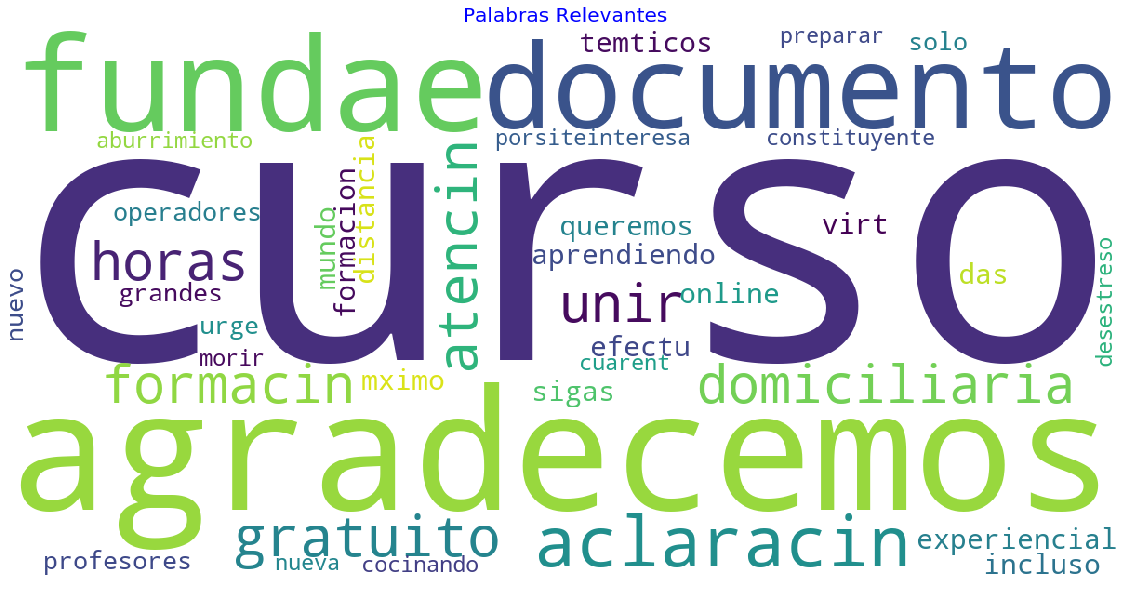

In [64]:
generateWordCloud(df['text_tokens'],"Palabras Relevantes")

In [82]:
nltk.download('averaged_perceptron_tagger')

#df["text_tokens"].head()
df1 = df["text_tokens"]
df1.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


143    [agradecemos, fundae, documento, aclaracin, du...
144    [curso, gratuito, atencin, domiciliaria, horas...
145    [qu, unir, formacin, experiencial, mundo, virt...
146    [imf, queremos, sigas, aprendiendo, mximo, das...
149     [cursos, temticos, formacion, online, distancia]
Name: text_tokens, dtype: object

In [95]:
def find_adjective(tagged):
    adjective = [w for w,t in tagged if "JJ" in t]
    if len(adjective) < 1:
        return ""
    else:
        return adjective[0]

In [115]:
adjective_tags = ["JJ", "JJR", "JJS"]

text = ""
for  tokens in df["text_tokens"]:
     #print(tokens)    
     tagged = nltk.pos_tag(tokens)
    
     #print(noun_preceders)
     for tg in tagged:
         if tg[1] == "JJ":
            text = text + " " + tg[0]
         if tg[1] == "JJJ":
            text = text + " " + tg[0]
     print(text)
                
            
         
     
     

['agradecemos', 'fundae', 'documento', 'aclaracin', 'dudas', 'surgieron', 'tras', 'resolucin', 'abril']
 documento
['curso', 'gratuito', 'atencin', 'domiciliaria', 'horas', 'teora', 'online', 'prcticas', 'segn', 'instruccionesposibil']
 documento online
['qu', 'unir', 'formacin', 'experiencial', 'mundo', 'virtuallos', 'humanosas', 'equipo', 'humano', 'conseguido', 'g']
 documento online unir formacin experiencial equipo
['imf', 'queremos', 'sigas', 'aprendiendo', 'mximo', 'das', 'confinamiento', 'ponemos', 'disposicin', 'nue']
 documento online unir formacin experiencial equipo imf
['cursos', 'temticos', 'formacion', 'online', 'distancia']
 documento online unir formacin experiencial equipo imf
['descubre', 'cursos', 'ofrece', 'academia', 'rsc', 'ingenierasocialun', 'total', 'cursos', 'online', 'engl']
 documento online unir formacin experiencial equipo imf ingenierasocialun total
['presentamos', 'formadoraamparo', 'donaire', 'snchezpaus', 'donnasexperta', 'comunicacin', 'efectiva']
 d

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda
['sbado', 'impartir', 'taller', 'bordado', 'gomas', 'especial', 'doodling', 'travs', 'us', 'duracin', 'so']
 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas prof

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

['debidas', 'previsiones', 'anti', 'covid', 'celebramos', 'hoy', 'abr', 'da', 'mundial', 'danza', 'vibraron', 'joropo', 'danza', 'contemp']
 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesun

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['ultimas', 'plazas', 'conoces', 'alguien', 'castilla', 'len', 'pueda', 'interesarcompartid', 'plis']
 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [131]:

for  tokens in df["text_clean"]:
     #print(tokens)   
     tagged = nltk.pos_tag(tokens)
     #print(tagged)
     for tg in tagged:
      if tg[1] == "JJ":
            text = text + " " + tg[0] 
print(text)    

 documento online unir formacin experiencial equipo imf ingenierasocialun total diplomados formacinprofesional obviar educativo delincuente tic nueva formacin delincuente mayo tributacin irpf formacin pro hora acceso curso profesional cursos canal debemos usar prstamo lnea nerea acompaada adoptadas profesional adoptadas profesional identidad digital qudateencasa israel ingresos xunta forzas nuevos crear r online especial sabemos s formacin municipal ofrece especial transmitido segundo hora acceso curso profesional imf vdeos formacin tcnica ayudarnos estival imbroda estival imbroda especial dos igual uso proponemos seguir hablar vdeos formacin voip ataque posicional seguimos debemos usar volvemos nunca oferta nuevos covid ms castaas hora acceso curso profesional oferta nuevos desarrollo personal csd tiempo inscrbete puede curso usabilidad ux pymesunidas madrid recibir realizan creando historias adoptadas profesional curso usabilidad ux apuntado cursos ms castaas urbana nctwayv alumnoslo

In [136]:
def generateWordCloud(data,title):
    wordcloud = WordCloud(background_color='white',
        stopwords=stop_words_sp,
        max_words=40,
        max_font_size=200, 
        scale=3,
        random_state=3).generate(str(data))


    wordcloud.recolor(random_state=1)
    plt.figure(figsize=(20, 15))
    plt.title(title, fontsize=20,color='blue')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

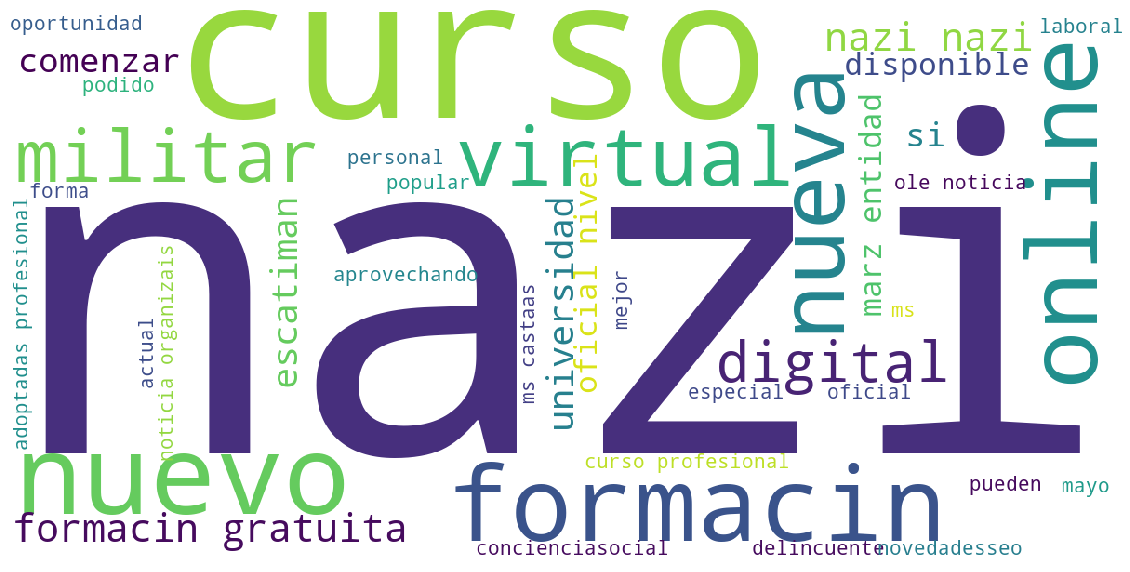

In [139]:
generateWordCloud(str(text),"")